In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/sherli001/.conda/envs/singlecell/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] limma_3.50.3          forcats_0.5.2         stringr_1.5.0        
 [4] dplyr_1.1.0           purrr_1.0.1           readr_2.1.3          
 [7] tidyr_1.3.0           tibble_3.1.7          ggplot2_3.3.6        
[10] tidyverse_1.3.2       AnnotationDbi_1.56.2  IRanges_2.28.0       


In [1]:
library(WGCNA)
library(AnnotationDbi)
library(tidyverse)
library(ggplot2)
options(stringsAsFactors = FALSE)

library(limma)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


In [3]:
# load in data to be used
load(file = "pairwise_RData_files/20230419_pairwise_WGCNA_ADNI_allSubjects_gender_rin_phase_corrected-01-dataInput.RData")

In [4]:
ls()

[1] "datExpr_CN_AD_gender_rin_phase_corrected"   
[2] "datExpr_CN_MCI_gender_rin_phase_corrected"  
[3] "datExpr_MCI_AD_gender_rin_phase_corrected"  
[4] "datTraits_CN_AD_gender_rin_phase_corrected" 
[5] "datTraits_CN_MCI_gender_rin_phase_corrected"
[6] "datTraits_MCI_AD_gender_rin_phase_corrected"

## Filter datExpr by highly variable genes

In [5]:
datExpr_MCI_AD_variance <- data.frame(matrix(nrow = ncol(datExpr_MCI_AD_gender_rin_phase_corrected), ncol = 1))
rownames(datExpr_MCI_AD_variance) <- colnames(datExpr_MCI_AD_gender_rin_phase_corrected)
colnames(datExpr_MCI_AD_variance)  <- "Variance"

datExpr_MCI_AD_variance["Variance"] <- apply(datExpr_MCI_AD_gender_rin_phase_corrected, MARGIN = 2, FUN= var)
datExpr_MCI_AD_variance$gene <- rownames(datExpr_MCI_AD_variance)

datExpr_MCI_AD_variance %>% head

,Variance,gene
,<dbl>,<chr>
11715100_at,0.03178481,11715100_at
11715101_s_at,0.03974062,11715101_s_at
11715102_x_at,0.02687573,11715102_x_at
11715103_x_at,0.07553094,11715103_x_at
11715104_s_at,0.02346307,11715104_s_at
11715105_at,0.02089890,11715105_at


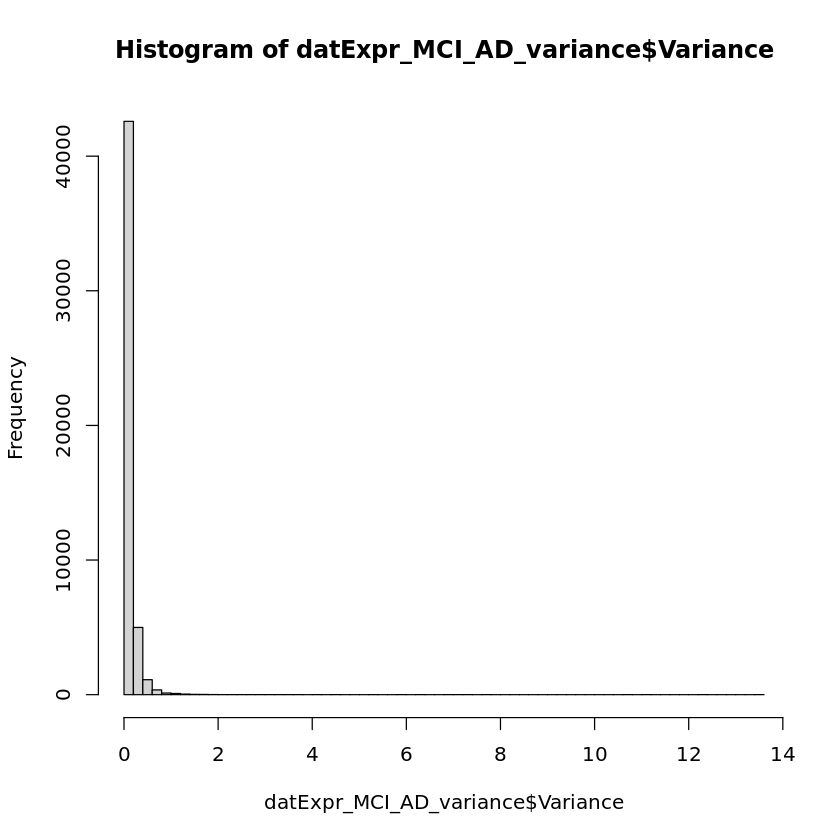

In [6]:
hist(datExpr_MCI_AD_variance$Variance, breaks = 50)

In [7]:
# identify top 20000 highly variable genes based on variance
datExpr_MCI_AD_HVGs <- (datExpr_MCI_AD_variance[order(datExpr_MCI_AD_variance$Variance, decreasing = TRUE), ])[1:20000,]
datExpr_MCI_AD_HVGs %>% head

# select HVGs from datExpr
datExpr_MCI_AD_selectHVGs <- datExpr_MCI_AD_gender_rin_phase_corrected[, rownames(datExpr_MCI_AD_HVGs)]
datExpr_MCI_AD_selectHVGs %>% head

,Variance,gene
,<dbl>,<chr>
11756083_x_at,13.588242,11756083_x_at
11732801_at,12.357143,11732801_at
11755998_x_at,11.023794,11755998_x_at
11760799_x_at,10.621318,11760799_x_at
11732800_a_at,7.753040,11732800_a_at
11752660_a_at,7.302677,11752660_a_at


,11756083_x_at,11732801_at,11755998_x_at,11760799_x_at,11732800_a_at,11752660_a_at,11734979_at,11732901_a_at,11762641_x_at,11715316_x_at,⋯,11720723_at,11719107_a_at,11717650_at,11759770_a_at,11720961_s_at,11741580_a_at,11742138_a_at,11721933_at,11750564_a_at,11748555_a_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
006_S_4153,7.5667585,2.659819,2.671150,12.573134,2.224214,2.080014,5.092468,10.011738,9.227504,8.859675,⋯,7.151020,4.622479,7.272819,1.487074,8.902057,7.265897,7.353959,8.389976,6.978521,2.906312
099_S_4205,-0.2594643,1.987284,9.361908,6.625220,1.550235,1.962281,10.400551,4.427394,9.204638,11.982276,⋯,7.325447,4.336455,7.160270,1.813741,8.949746,7.426065,7.372238,8.404515,6.807917,2.871944
007_S_4467,0.1116139,2.231733,8.700337,6.873802,1.656234,1.769970,10.335552,3.767273,8.590350,9.012611,⋯,6.855434,4.276239,7.224822,1.422315,9.138914,7.198488,7.495895,8.629481,6.994699,2.870774
003_S_2374,0.6288663,9.061404,8.764111,13.198463,7.477039,7.365168,10.659126,4.252568,9.634834,9.297144,⋯,6.660165,3.948723,6.767223,1.166833,8.148991,7.354232,7.896720,7.780821,6.864718,2.954462
031_S_2018,7.3773871,9.175760,9.921587,6.374538,7.467595,7.287195,4.994014,3.525955,4.675740,9.178551,⋯,7.500504,4.421708,7.576756,1.237022,8.622472,7.652489,7.145428,8.186391,7.171815,2.654649
002_S_4654,7.3884941,9.362572,2.581956,12.749071,7.279123,7.274227,9.899774,4.164620,9.781827,11.977463,⋯,6.962769,4.276485,7.146205,1.594363,8.630784,7.435552,7.622822,8.130374,7.056723,2.613570


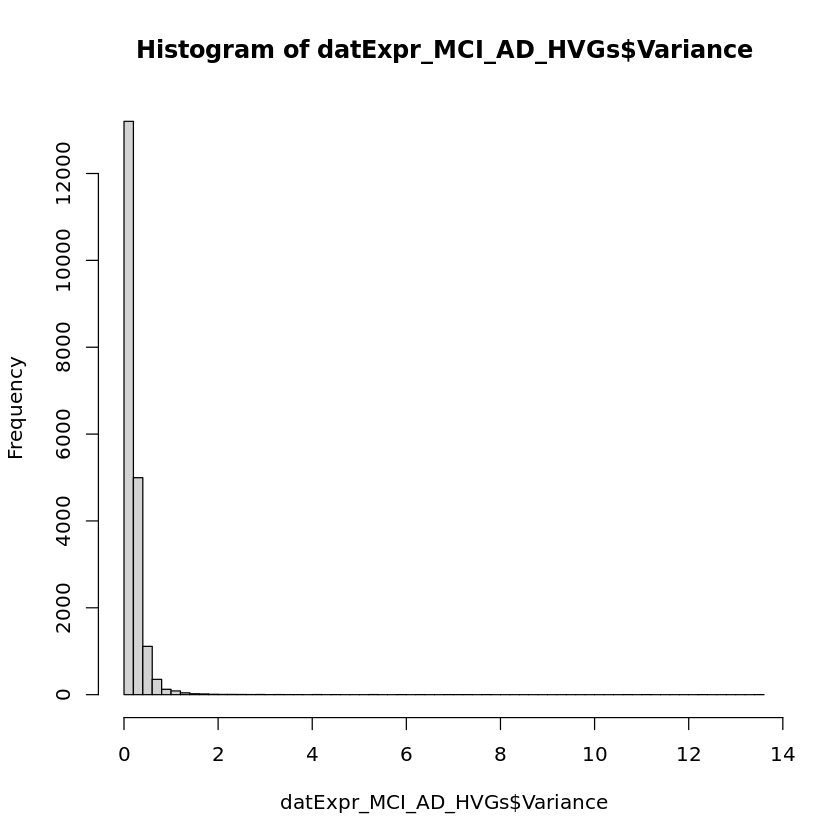

In [8]:
hist(datExpr_MCI_AD_HVGs$Variance, breaks = 50)

In [10]:
# save HVGs as RData
save(datExpr_MCI_AD_selectHVGs, file = "pairwise_RData_files/20230419_datExpr_MCI_AD_gender_rin_phase_corrected_selectHVGs.RData")

In [11]:
# pick soft thresholding power
start <- Sys.time()
# Choose a set of soft-thresholding powers:
powers <- c(c(1:10), seq(from=12, to=20, by=2))
# Call the network topology function
sft <- pickSoftThreshold(datExpr_MCI_AD_selectHVGs, powerVector = powers, verbose = 5)
print(Sys.time() - start)

pickSoftThreshold: will use block size 2236.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 2236 of 20000


Warning message:
“executing %dopar% sequentially: no parallel backend registered”


   ..working on genes 2237 through 4472 of 20000
   ..working on genes 4473 through 6708 of 20000
   ..working on genes 6709 through 8944 of 20000
   ..working on genes 8945 through 11180 of 20000
   ..working on genes 11181 through 13416 of 20000
   ..working on genes 13417 through 15652 of 20000
   ..working on genes 15653 through 17888 of 20000
   ..working on genes 17889 through 20000 of 20000
   Power SFT.R.sq slope truncated.R.sq  mean.k. median.k. max.k.
1      1   0.0429 -0.26          0.921 3230.000  3.06e+03 6530.0
2      2   0.7310 -1.16          0.932  912.000  7.24e+02 3140.0
3      3   0.8430 -1.39          0.939  348.000  2.14e+02 1800.0
4      4   0.8770 -1.46          0.948  160.000  7.40e+01 1140.0
5      5   0.8900 -1.50          0.956   83.100  2.84e+01  782.0
6      6   0.9020 -1.51          0.967   47.300  1.18e+01  560.0
7      7   0.9000 -1.52          0.968   28.700  5.25e+00  415.0
8      8   0.8860 -1.55          0.960   18.400  2.55e+00  315.0
9      9   0.8

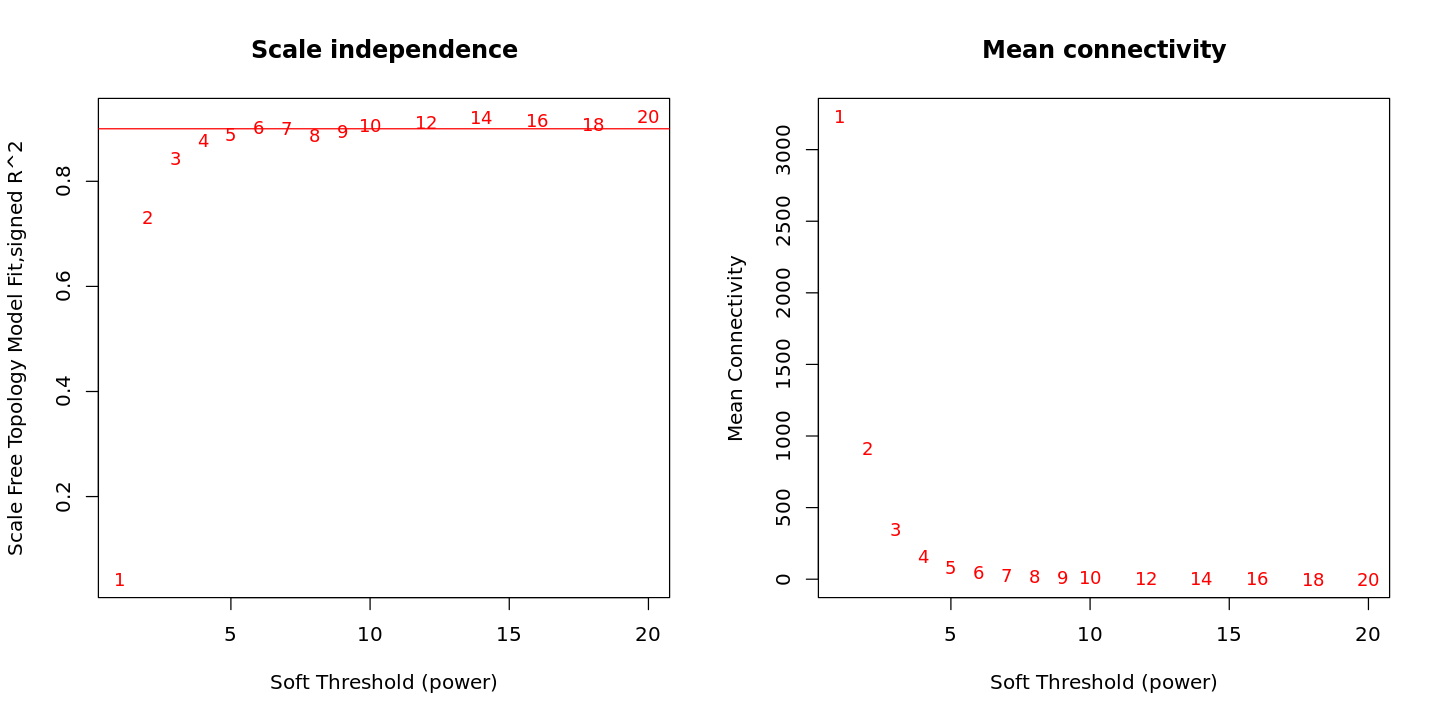

In [12]:
options(repr.plot.width=12, repr.plot.height=6)
# Plot results from soft-thresholding powers
par(mfrow = c(1,2));
cex1 = 0.9;

# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");

# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")

# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

# Trying power = 6 

## Co-expression similarity and adjacency

In [13]:
start <- Sys.time()
softPower <- 5
adjacency <- WGCNA::adjacency(datExpr_MCI_AD_selectHVGs, 
                              power = softPower)
print(Sys.time() - start)

Time difference of 27.77803 mins


In [14]:
adjacency %>% head

,11756083_x_at,11732801_at,11755998_x_at,11760799_x_at,11732800_a_at,11752660_a_at,11734979_at,11732901_a_at,11762641_x_at,11715316_x_at,⋯,11720723_at,11719107_a_at,11717650_at,11759770_a_at,11720961_s_at,11741580_a_at,11742138_a_at,11721933_at,11750564_a_at,11748555_a_at
11756083_x_at,1.000000e+00,5.268049e-09,1.051374e-03,5.123928e-07,9.483315e-09,1.735873e-08,1.256495e-07,1.358440e-08,6.854005e-03,1.166493e-03,⋯,5.840303e-08,4.614701e-09,3.611725e-09,5.135524e-10,1.995926e-08,5.521218e-08,2.555257e-07,7.118432e-07,3.185983e-08,1.398885e-08
11732801_at,5.268049e-09,1.000000e+00,1.436228e-06,3.392950e-06,9.802796e-01,9.769900e-01,3.894922e-09,6.072999e-12,2.122968e-08,2.178569e-06,⋯,6.759202e-09,1.630417e-07,2.289745e-10,1.862694e-06,3.301387e-08,1.173197e-06,2.135399e-12,2.015557e-06,2.699946e-09,4.334199e-08
11755998_x_at,1.051374e-03,1.436228e-06,1.000000e+00,3.007610e-06,1.681035e-06,1.508777e-06,7.808961e-08,3.295440e-06,3.087486e-02,1.561873e-04,⋯,1.046630e-08,1.207871e-06,1.037965e-08,1.300988e-06,2.581779e-07,3.484651e-05,1.194644e-06,4.317472e-13,4.471178e-06,9.351347e-08
11760799_x_at,5.123928e-07,3.392950e-06,3.007610e-06,1.000000e+00,3.329084e-06,5.198230e-06,2.255009e-07,4.097159e-08,4.633341e-06,1.262240e-07,⋯,3.203509e-06,1.489764e-08,2.929506e-06,1.272678e-06,3.778092e-08,4.325217e-10,9.452193e-08,2.971124e-06,1.944540e-08,4.969565e-08
11732800_a_at,9.483315e-09,9.802796e-01,1.681035e-06,3.329084e-06,1.000000e+00,9.891933e-01,4.569805e-09,4.652894e-12,1.880494e-08,1.738097e-06,⋯,3.965952e-10,2.485390e-07,6.557771e-12,1.383672e-06,8.856617e-09,3.773226e-06,4.692714e-11,5.425085e-06,2.785300e-08,2.594003e-08
11752660_a_at,1.735873e-08,9.769900e-01,1.508777e-06,5.198230e-06,9.891933e-01,1.000000e+00,1.437942e-09,7.426477e-13,3.262609e-08,1.268289e-06,⋯,7.536720e-10,2.932887e-07,7.471125e-12,1.680098e-06,1.537505e-08,2.369688e-06,8.324093e-12,4.715446e-06,7.192265e-09,1.955774e-08


In [15]:
# save output so I don't have to keep loading the whole workspace
adjacency_MCI_AD_gender_rin_phase_corrected <- adjacency
save(adjacency_MCI_AD_gender_rin_phase_corrected, file = "pairwise_RData_files/20230419_adjacency_MCI_AD_gender_rin_phase_corrected.RData")

## Topological overlap matrix

In [17]:
# Turn adjacency into topological overlap
start <- Sys.time()
TOM = TOMsimilarity(adjacency);
dissTOM = 1-TOM 
print( Sys.time() - start )

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.
Time difference of 33.97324 secs


In [18]:
dissTOM_MCI_AD_gender_rin_phase_corrected <- dissTOM
save(dissTOM_MCI_AD_gender_rin_phase_corrected, file = "pairwise_RData_files/20230419_dissTOM_MCI_AD_gender_rin_phase_corrected.RData")

## Clustering using TOM

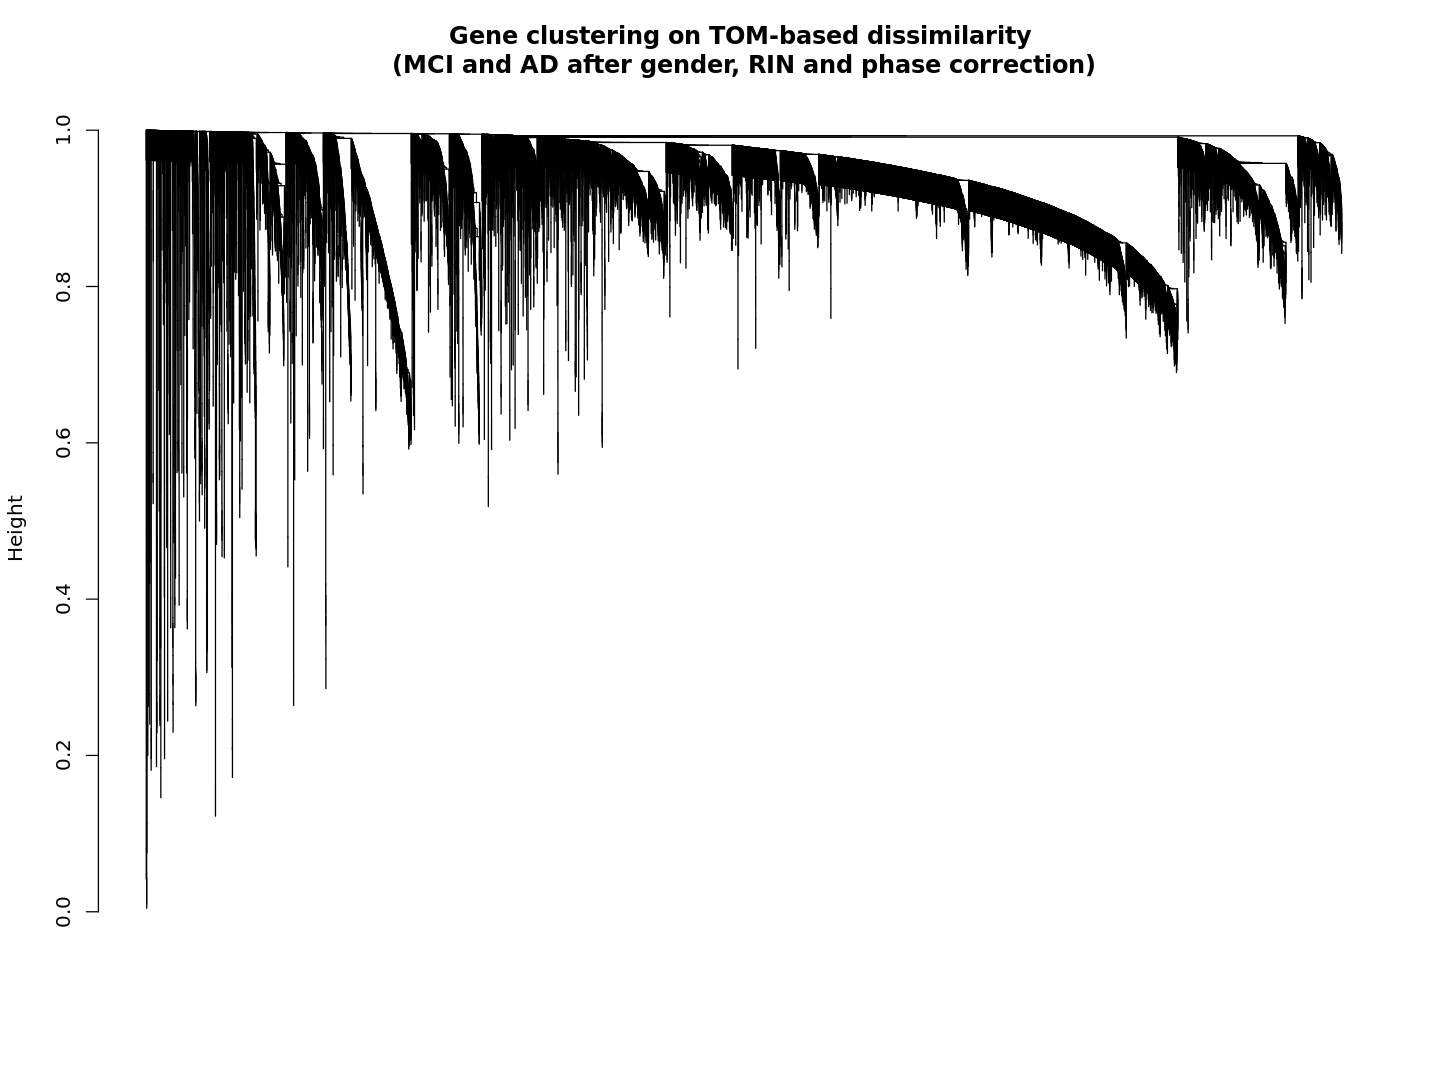

In [19]:
# Call the hierarchical clustering function
geneTree = hclust(as.dist(dissTOM), method = "average");

# Plot the resulting clustering tree (dendrogram)
options(repr.plot.width = 12, repr.plot.height = 9)
plot(geneTree, xlab="", sub="", 
     main = "Gene clustering on TOM-based dissimilarity \n(MCI and AD after gender, RIN and phase correction)",
     labels = FALSE, hang = 0.04);

In [20]:
# We like large modules, so we set the minimum module size relatively high:
minModuleSize = 30;
# Module identification using dynamic tree cut:
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
                            deepSplit = 2, pamRespectsDendro = FALSE,
                            minClusterSize = minModuleSize);
table(dynamicMods) # 28 modules

 ..cutHeight not given, setting it to 0.998  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 216 7875 3111 1402 1050  937  549  545  542  523  415  373  339  271  232  210 
  16   17   18   19   20   21   22   23   24   25   26   27   28 
 188  186  177  160  157   99   92   91   82   65   51   31   31 

dynamicColors
        black          blue         brown          cyan     darkgreen 
          545          3111          1402           232            92 
     darkgrey    darkorange       darkred darkturquoise         green 
           82            51            99            91           937 
  greenyellow          grey        grey60     lightcyan    lightgreen 
          373           216           186           188           177 
  lightyellow       magenta  midnightblue        orange          pink 
          160           523           210            65           542 
       purple           red     royalblue        salmon       skyblue 
          415           549           157           271            31 
          tan     turquoise         white        yellow 
          339          7875            31          1050 

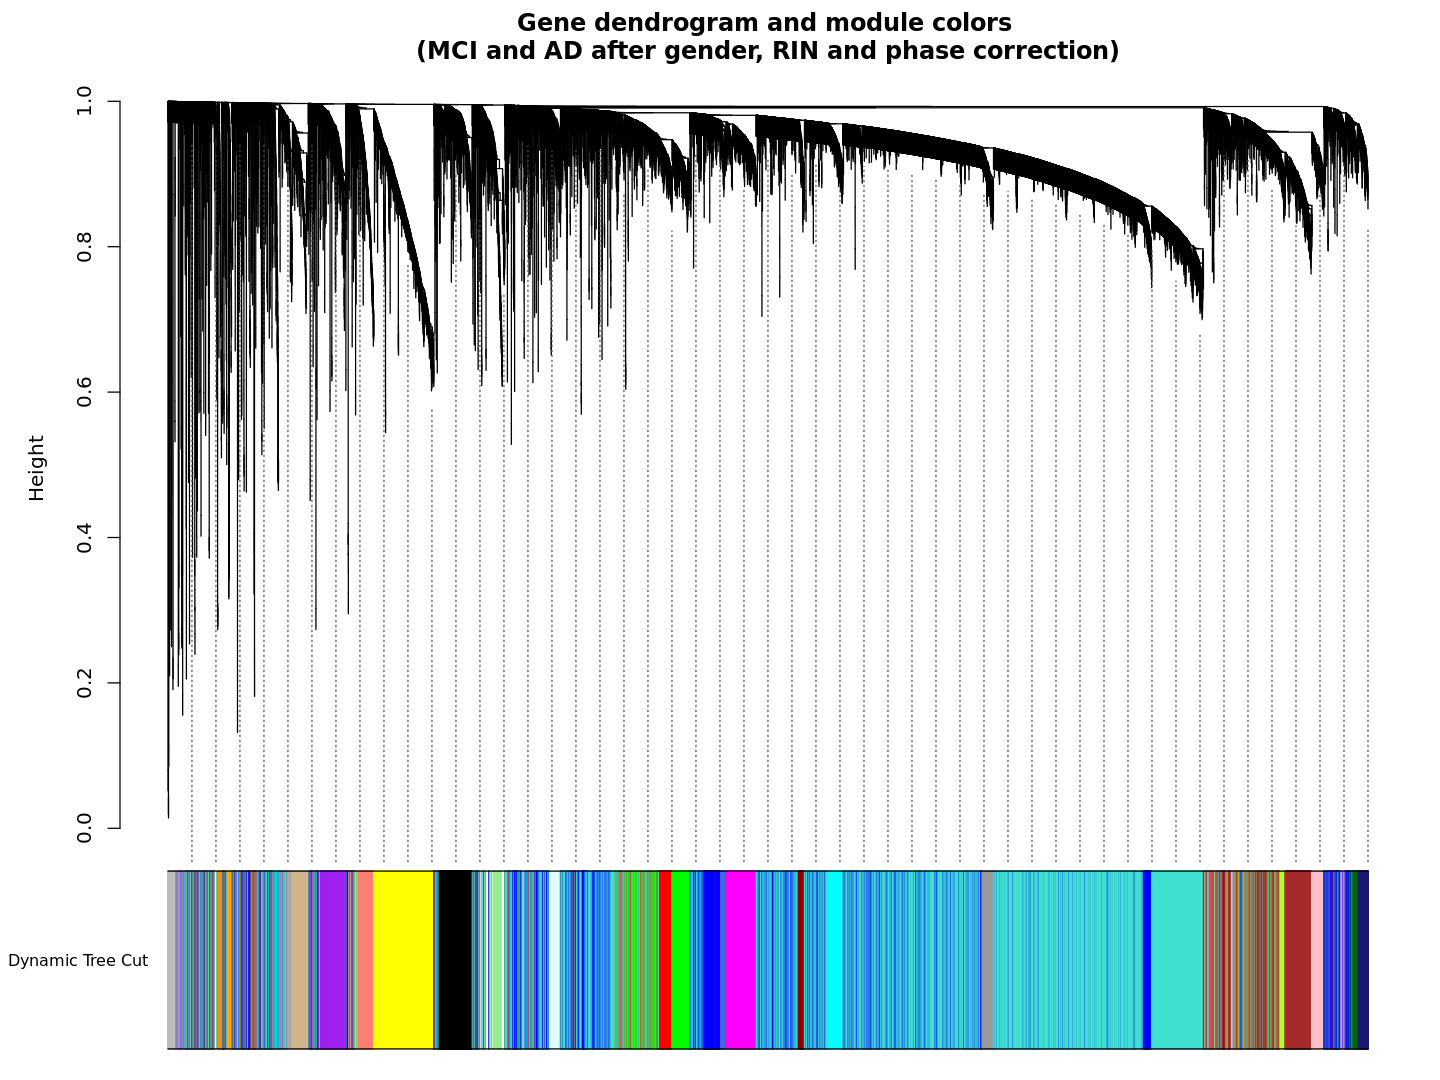

In [21]:
# Convert numeric lables into colors
dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)
# Plot the dendrogram and colors underneath
#sizeGrWindow(8,6)
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors \n(MCI and AD after gender, RIN and phase correction)")

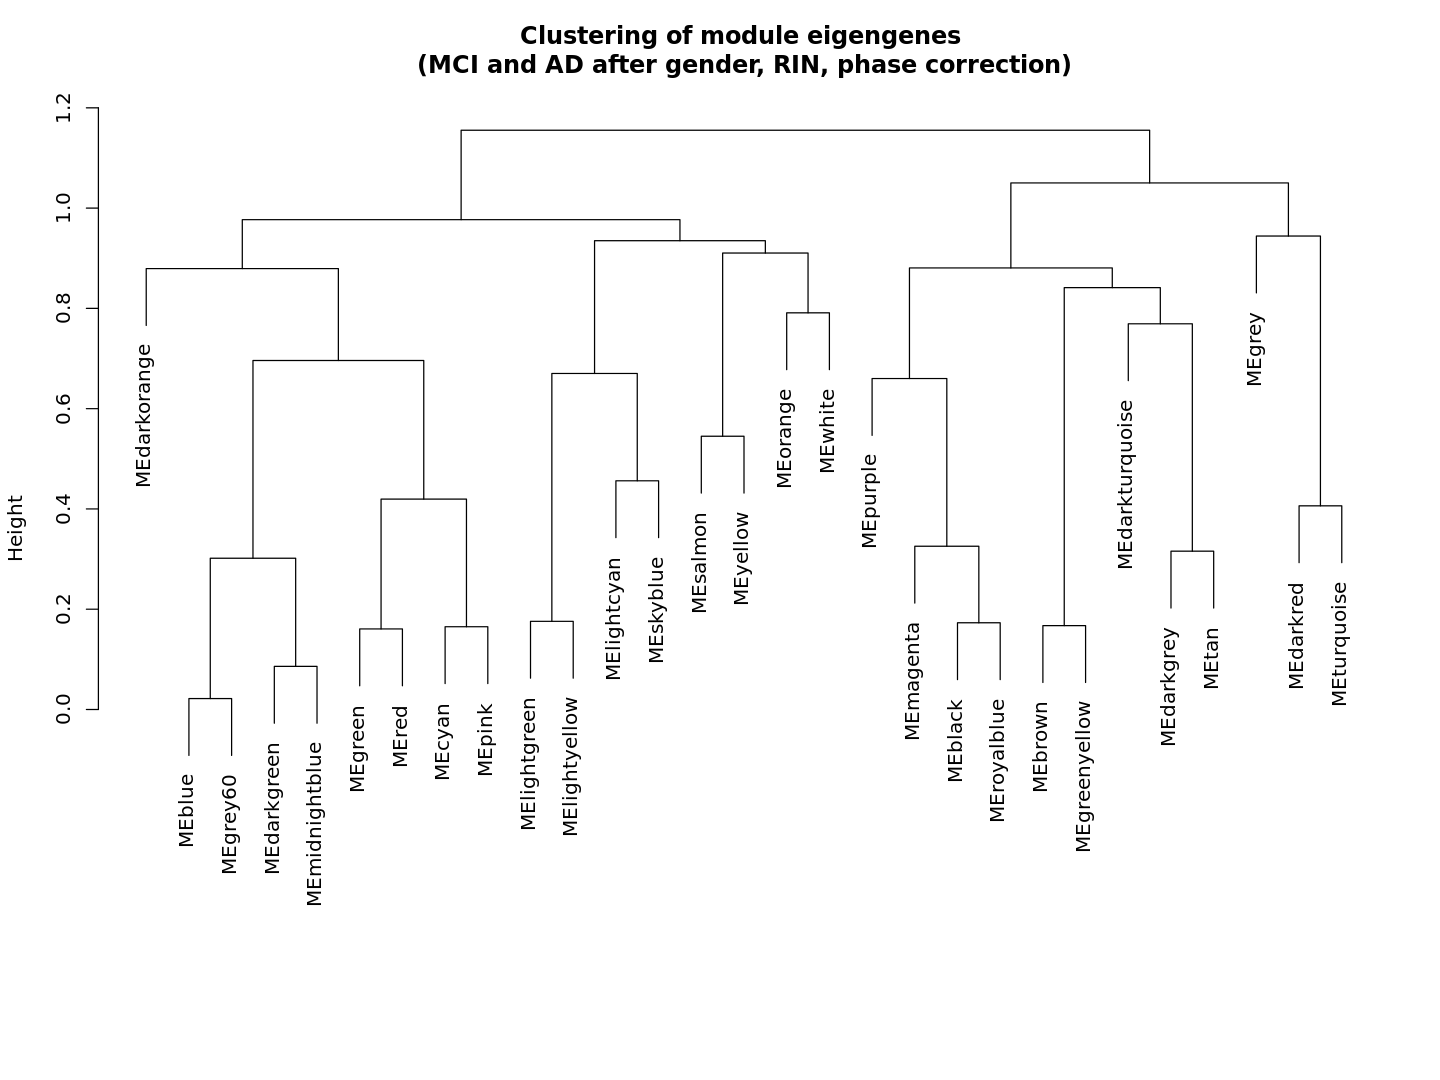

In [22]:
# Calculate eigengenes
MEList = moduleEigengenes(datExpr_MCI_AD_selectHVGs, colors = dynamicColors)
MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = hclust(as.dist(MEDiss), method = "average");
# Plot the result
# sizeGrWindow(7, 6)
plot(METree, main = "Clustering of module eigengenes \n(MCI and AD after gender, RIN, phase correction)",
     xlab = "", sub = "")

## Merge modules with similar expression profiles

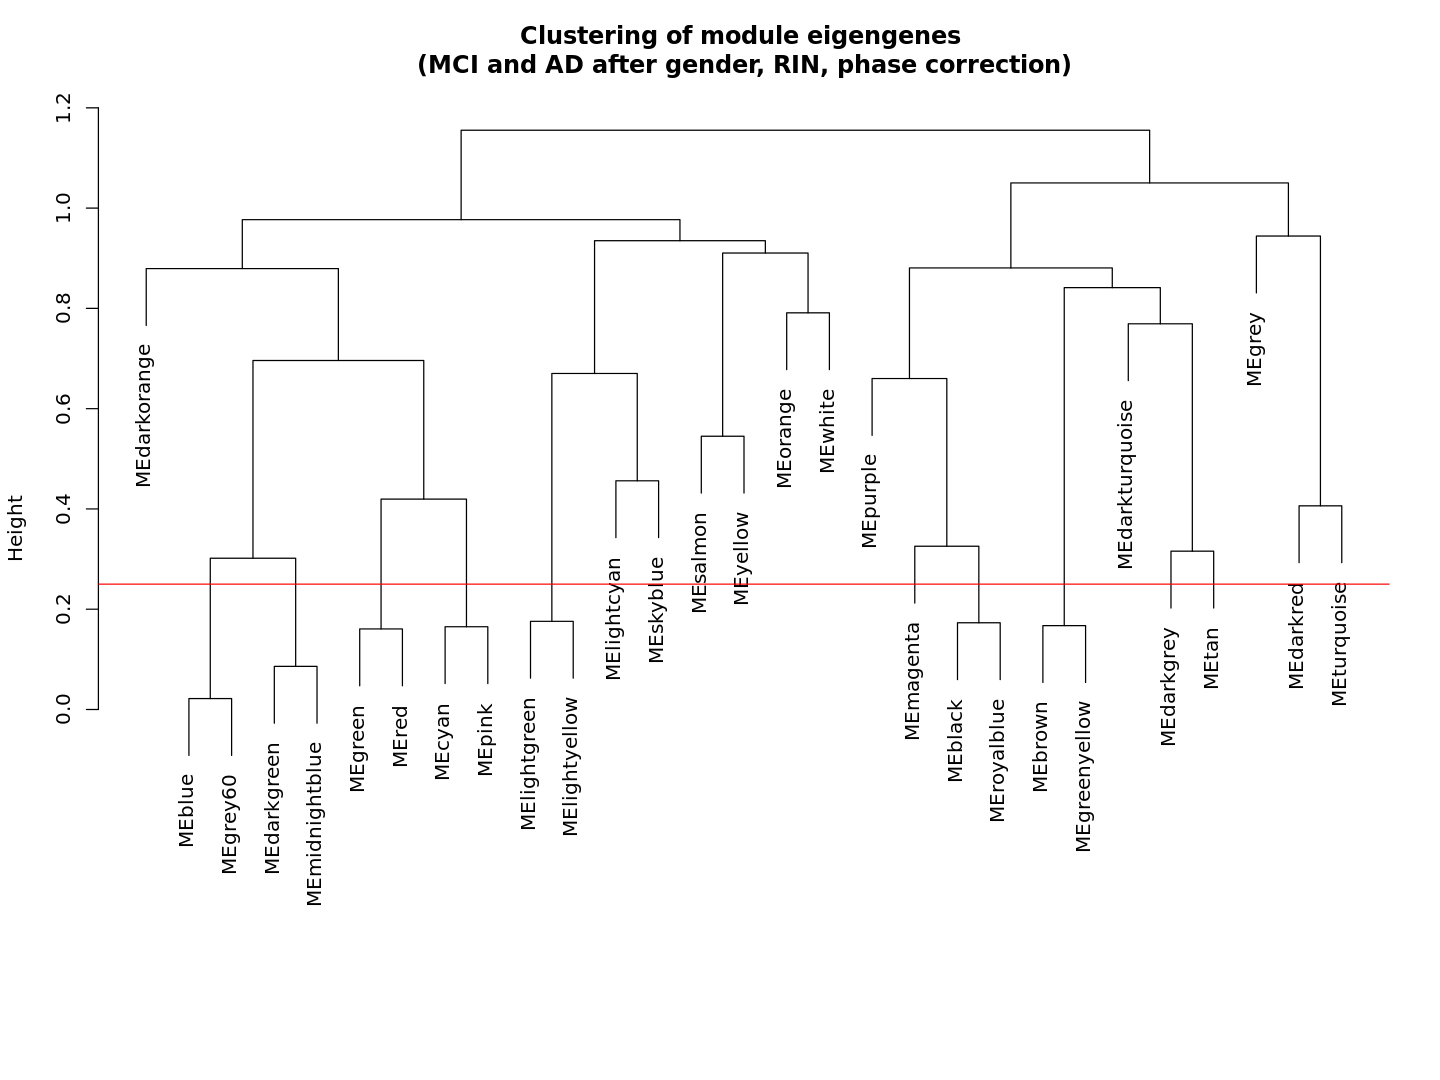

In [24]:
options(repr.plot.width = 12, repr.plot.height = 9)

plot(METree, main = "Clustering of module eigengenes \n(MCI and AD after gender, RIN, phase correction)",
     xlab = "", sub = "")

MEDissThres = 0.25
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

In [25]:
pdf(file = "pairwise_plots/20230419merge_modules_MCI_AD_gender_rin_phase_corrected.pdf", width = 12, height = 9)

plot(METree, main = "Clustering of module eigengenes \n(MCI and AD after gender, RIN, phase correction)",
     xlab = "", sub = "")

MEDissThres = 0.25
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

dev.off()

png 
  2

In [26]:
# Call an automatic merging function
start <- Sys.time()
merge = mergeCloseModules(datExpr_MCI_AD_selectHVGs, dynamicColors, 
                          cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs;
print(Sys.time() - start)

 mergeCloseModules: Merging modules whose distance is less than 0.25
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 29 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 22 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 22 module eigengenes in given set.
Time difference of 14.29795 secs


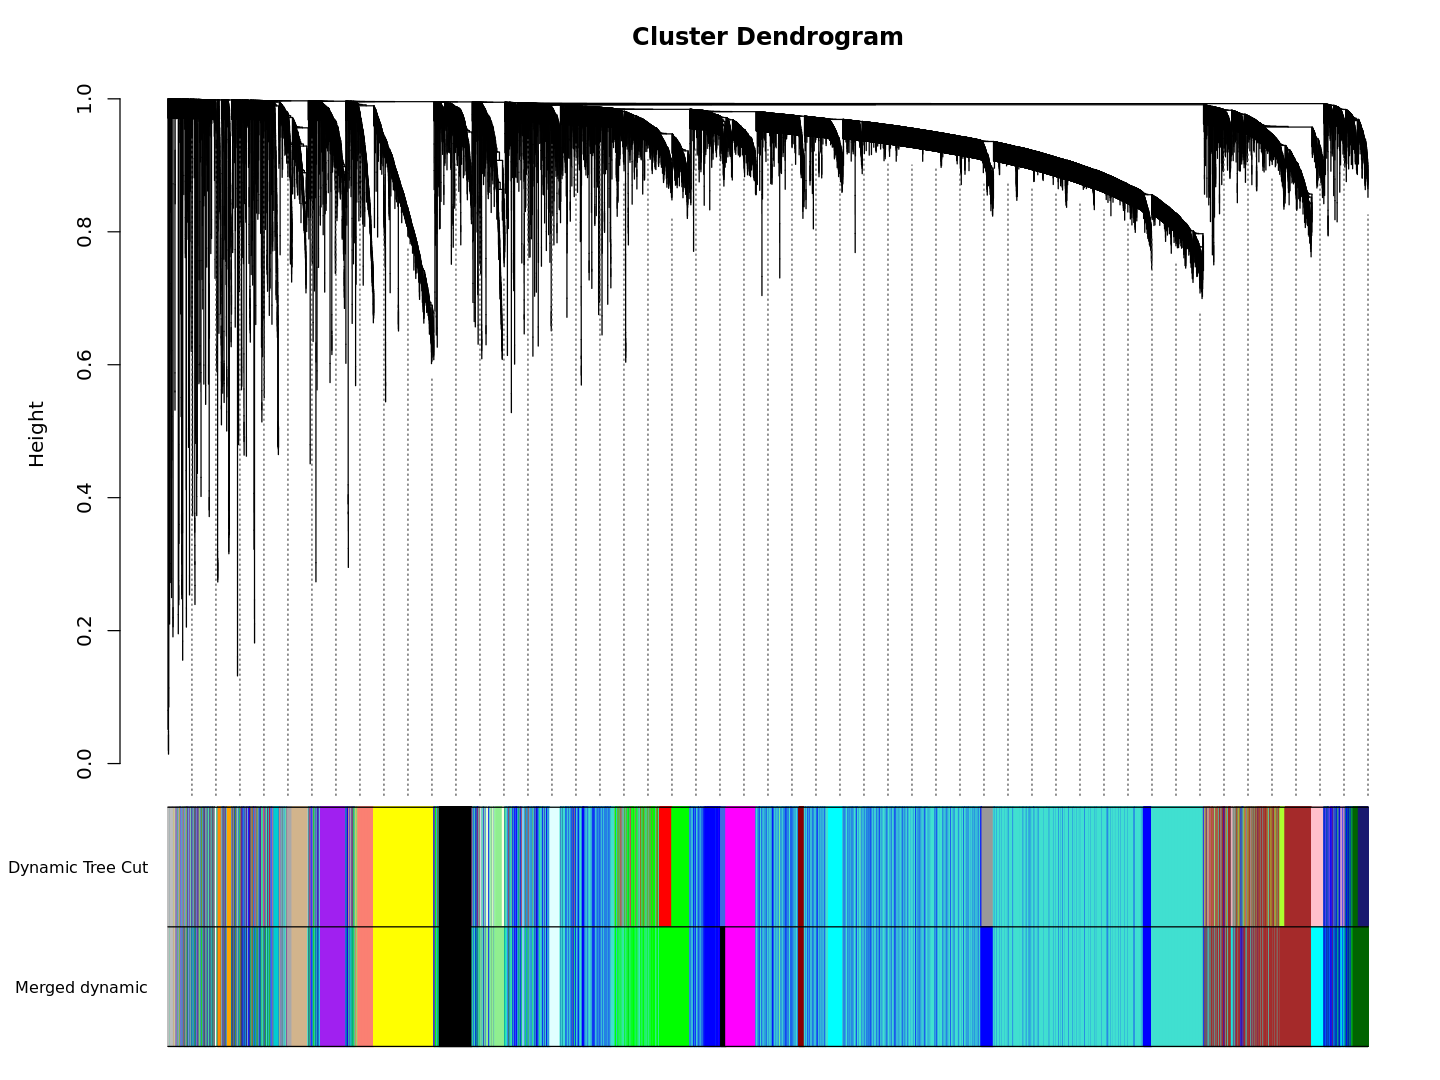

In [27]:
options(repr.plot.width = 12, repr.plot.height = 9)
# sizeGrWindow(12, 9)
#pdf(file = "Plots/geneDendro-3.pdf", wi = 9, he = 6)
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                    c("Dynamic Tree Cut", "Merged dynamic"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)
#dev.off()

In [28]:
pdf(file = "pairwise_plots/20230419_MCI_AD_gender_rin_phase_corrected_geneDendro-3.pdf", wi = 12, he = 9)
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                    c("Dynamic Tree Cut", "Merged dynamic"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)
dev.off()

png 
  2

In [29]:
# Rename to moduleColors
moduleColors_MCI_AD_gender_rin_phase = mergedColors
# Construct numerical labels corresponding to the colors
colorOrder = c("grey", standardColors(50));
moduleLabels_MCI_AD_gender_rin_phase = match(moduleColors_MCI_AD_gender_rin_phase, colorOrder)-1;
MEs_MCI_AD_gender_rin_phase = mergedMEs;
geneTree_MCI_AD_gender_rin_phase = geneTree;

# Save module colors and labels for use in subsequent parts
save(MEs_MCI_AD_gender_rin_phase, moduleLabels_MCI_AD_gender_rin_phase, 
     moduleColors_MCI_AD_gender_rin_phase, geneTree_MCI_AD_gender_rin_phase, 
     file = "pairwise_RData_files/20230419_MCI_AD_gender_rin_phase_corrected-02-networkConstruction-stepByStep.RData")